## Checking Weight Initialization Example from Lecture 10

In [1]:
# import dependencies

import torch
import numpy as np

In [2]:
dims = [4096] * 7

hs = []
x = np.random.randn(16, dims[0])

for Din, Dout in zip(dims[:-1], dims[1:]):
    W = 0.01 * np.random.randn(Din, Dout)
    x = np.tanh(x.dot(W))
    hs.append(x)

len(hs)

6

In [3]:
[np.mean(cur_x) for cur_x in hs]

[np.float64(-0.002256099579156435),
 np.float64(-0.0018513263611844093),
 np.float64(-0.0005907147607573586),
 np.float64(-5.237595443678645e-05),
 np.float64(9.401403285150774e-05),
 np.float64(-2.37279526153435e-05)]

In [4]:
[np.std(cur_x) for cur_x in hs]

[np.float64(0.4914126655262676),
 np.float64(0.2885768324076693),
 np.float64(0.1791428487103789),
 np.float64(0.11306192839036884),
 np.float64(0.07187561104169118),
 np.float64(0.046153351850122884)]

In [ ]:
from matplotlib.pyplot import hist

hist(hs[0], bins=1000)

## What is @staticmethod and when we use it.

In [6]:
class A:
    @staticmethod
    def f(x,y):
        return x + y
    
    def g(x, y):
        return x + y

print(A().f(1,2))


print(A().g(1,2))

3


TypeError: A.g() takes 2 positional arguments but 3 were given

In [2]:
import torch

In [12]:
box = torch.randint(0, 19, size=(16, 1029, 5))
box[0][0]
class_idx = box[..., -1]
class_idx.shape

torch.Size([16, 1029])

In [11]:
one_hot = torch.zeros(16, 1029, 20)
reshaped = one_hot.reshape(-1, 20)

reshaped.shape

torch.Size([16464, 20])

In [15]:
one_hot[class_idx] = 1

IndexError: index 18 is out of bounds for dimension 0 with size 16

In [40]:
boxes = (100.0 * torch.rand(5000, 4)).round()
boxes[:, 2] = boxes[:, 2] + boxes[:, 0] + 1.0
boxes[:, 3] = boxes[:, 3] + boxes[:, 1] + 1.0
scores = torch.randn(5000)

In [41]:
order = scores.argsort(descending=True)
order

tensor([3409, 3532, 2519,  ..., 2343, 1881, 1888])

In [19]:
order.numel()

5000

In [23]:
boxes.shape

torch.Size([5000, 4])

In [34]:
iou_threshold = 0.5

In [42]:
keep = torch.empty_like(order)

x1, y1, x2, y2 = boxes.T

areas = (x2 - x1) * (y2 - y1)
index = 0

while order.numel() > 1:
    i = order[0]
    keep[index] = i
    index += 1
    order = order[1:]

    x11 = x1[i]
    y11 = y1[i]
    x22 = x2[i]
    y22 = y2[i]
    print(x2)
    intersection = (torch.min(x22, x2[order]) - torch.max(x11, x1[order])) * (torch.min(y11, y1[order]) - torch.max(y22, y2[order]))
    invalid = intersection <= 0
    union = areas[i] + areas[order] - intersection
    
    IoU = (intersection / union)

    IoU[invalid] = 1

    order = order[IoU < iou_threshold]

    # break

tensor([139., 133.,  76.,  ...,  67., 114., 100.])
tensor([139., 133.,  76.,  ...,  67., 114., 100.])
tensor([139., 133.,  76.,  ...,  67., 114., 100.])


In [43]:
keep

tensor([3409, 3758, 4017,  ...,    0,    0,    0])

In [31]:
torch.min(x22, x2[order])

tensor([71., 81., 81.,  ..., 69.,  9., 81.])

In [46]:
scores = torch.randn(3, 5)
scores

tensor([[-0.9431,  0.3383, -1.3956,  0.3293, -0.0883],
        [-0.3418,  0.2713,  0.1910, -1.8345,  1.3574],
        [ 0.1800, -0.3412,  0.1500,  2.3205, -0.0336]])

In [5]:
import torch
N = 5
M = 3
boxes1 = torch.randn(M, 1)
boxes2 = torch.randn(N, 1)

In [10]:
boxes1

tensor([[ 0.3605],
        [ 1.6638],
        [-0.6169]])

In [7]:
boxes2

tensor([[-0.7625],
        [-0.1307],
        [ 0.5809],
        [-0.2875],
        [ 1.5804]])

In [11]:
torch.min(boxes1.unsqueeze(1), boxes2.unsqueeze(0))

tensor([[[-0.7625],
         [-0.1307],
         [ 0.3605],
         [-0.2875],
         [ 0.3605]],

        [[-0.7625],
         [-0.1307],
         [ 0.5809],
         [-0.2875],
         [ 1.5804]],

        [[-0.7625],
         [-0.6169],
         [-0.6169],
         [-0.6169],
         [-0.6169]]])

In [12]:
match_matrix = torch.randn(10, 5)
match_matrix

tensor([[-1.3889, -0.4123, -0.9019,  1.5055, -1.6385],
        [-0.4762, -0.9023,  1.5034,  0.9991, -1.7529],
        [ 0.7847, -1.0700, -0.2384, -1.2256, -0.6155],
        [-0.2814, -0.6549,  2.0578,  0.8564,  0.1976],
        [ 1.0172, -0.8259,  1.3408,  0.7952,  1.3581],
        [-2.3796, -0.9719,  1.0648,  0.1317,  0.9281],
        [ 0.6062,  0.5487,  0.4198, -0.8212, -1.1942],
        [-0.7292,  0.2112,  0.7901, -0.9316,  0.8672],
        [-1.3553,  1.6075, -0.3743,  1.7987, -1.8518],
        [-0.2093,  0.7644,  0.7719,  0.3336, -0.8175]])

In [13]:
match_matrix.max(dim=1)

torch.return_types.max(
values=tensor([1.5055, 1.5034, 0.7847, 2.0578, 1.3581, 1.0648, 0.6062, 0.8672, 1.7987,
        0.7719]),
indices=tensor([3, 2, 0, 2, 4, 2, 0, 4, 3, 2]))

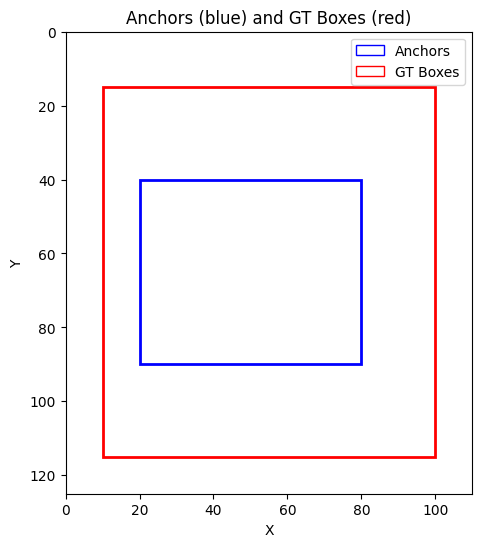

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define your rectangles as plain lists (x1, y1, x2, y2)
input_anchors = [
    (20, 40, 80, 90),
]
input_boxes = [
    (10, 15, 100, 115),
]

fig, ax = plt.subplots(figsize=(6, 6))

# Plot each anchor in blue
for x1, y1, x2, y2 in input_anchors:
    rect = patches.Rectangle(
        (x1, y1),          # lower‑left corner
        x2 - x1,           # width
        y2 - y1,           # height
        linewidth=2,
        edgecolor='blue',
        facecolor='none',
        label='Anchor'
    )
    ax.add_patch(rect)

# Plot each GT box in red
for x1, y1, x2, y2 in input_boxes:
    rect = patches.Rectangle(
        (x1, y1),
        x2 - x1,
        y2 - y1,
        linewidth=2,
        edgecolor='red',
        facecolor='none',
        label='GT Box'
    )
    ax.add_patch(rect)

# Determine the display limits
all_x2 = [r[2] for r in input_anchors] + [r[2] for r in input_boxes]
all_y2 = [r[3] for r in input_anchors] + [r[3] for r in input_boxes]
max_x, max_y = max(all_x2), max(all_y2)

ax.set_xlim(0, max_x + 10)
ax.set_ylim(0, max_y + 10)
ax.set_aspect('equal')
ax.invert_yaxis()  # if you want image‐style coordinates (y increases downward)

# One legend entry each
handles = [
    patches.Patch(edgecolor='blue', facecolor='none', label='Anchors'),
    patches.Patch(edgecolor='red', facecolor='none', label='GT Boxes'),
]
ax.legend(handles=handles, loc='upper right')

ax.set_title('Anchors (blue) and GT Boxes (red)')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


In [18]:
scores = torch.randn(10)
scores

tensor([-0.8048,  0.9941, -0.0257,  0.3315,  2.1705,  0.3613, -0.4382, -0.4241,
        -1.5304, -1.2921])

In [29]:
boxes = torch.randn(10, 4)
boxes

tensor([[ 0.1753, -0.0313,  1.8549,  0.7277],
        [-2.1304, -0.3281,  0.3890, -0.2823],
        [ 1.2826, -1.0733,  0.1804,  0.5030],
        [ 1.8292, -0.0114, -2.1644,  0.4923],
        [ 0.8639, -0.1557, -0.4151,  3.5432],
        [-1.0251,  0.8702,  0.6226, -1.1233],
        [-0.9409, -0.0891,  0.8287,  2.4856],
        [-1.0087, -1.1129, -0.2242, -1.4193],
        [-2.0083, -0.2041,  0.5523, -1.1922],
        [-0.3012, -0.7936, -0.1102,  0.9253]])

In [27]:
index = torch.topk(scores, 3, sorted=False).indices
index

tensor([4, 1, 5])

In [30]:
boxes[index]

tensor([[ 0.8639, -0.1557, -0.4151,  3.5432],
        [-2.1304, -0.3281,  0.3890, -0.2823],
        [-1.0251,  0.8702,  0.6226, -1.1233]])

In [8]:
import torch
input = torch.randn(4, 1, 5, 5)

out = torch.nn.Flatten()(input)
out.shape

torch.Size([4, 25])

In [20]:
level_props = [torch.randn(5, 4), torch.randn(3, 4)]

batch_ids = []
for i in range(len(level_props)):
    batch_ids.extend([i] * len(level_props[i]))

batch_ids = torch.tensor(batch_ids, dtype=level_props[0].dtype)

In [25]:
torch.cat([batch_ids[:, None], torch.cat(level_props, dim=0)], dim=1) 

tensor([[ 0.0000,  0.1483, -0.2815,  0.0103,  1.7794],
        [ 0.0000, -1.3737,  0.8634, -0.4303, -0.1880],
        [ 0.0000,  0.4117,  0.5207, -0.3557,  0.3785],
        [ 0.0000,  0.9432, -1.3906,  1.3396,  1.4083],
        [ 0.0000,  1.9804,  0.1735, -1.0616, -0.0478],
        [ 1.0000,  0.0106,  0.0901,  0.2662,  1.1077],
        [ 1.0000, -0.4760,  2.0655,  0.4241, -0.2444],
        [ 1.0000, -0.4660,  2.2836,  1.1281, -0.2491]])

In [26]:
pred_cls_logits = torch.randn(10, 5)
pred_cls_logits

tensor([[-0.3963, -0.5023, -0.7048, -0.4039, -0.4442],
        [ 1.4605, -0.3500, -0.1021,  0.8280, -0.2750],
        [-1.6292, -1.3581,  0.0051,  0.6387, -1.1421],
        [ 0.5192,  0.7772,  0.3584,  1.1729,  1.3297],
        [ 0.3027,  0.1749,  0.9958, -0.0861, -0.6729],
        [ 0.9891, -1.7631,  0.9113, -0.7817,  0.4930],
        [ 0.2738, -0.6397,  0.1719, -1.0196, -1.0477],
        [-0.5751, -1.5268, -0.1939,  0.6863, -1.5563],
        [ 1.0053,  0.9352, -0.2446, -1.2254,  0.8029],
        [-1.0038,  1.5999,  1.7966,  1.1255, -0.0627]])

In [28]:
pred_classes = pred_cls_logits.argmax(dim=1)
pred_classes

tensor([0, 0, 3, 4, 2, 0, 0, 3, 0, 2])

In [32]:
pred_scores = torch.softmax(pred_cls_logits, dim=1)
pred_scores

tensor([[0.2184, 0.1964, 0.1604, 0.2167, 0.2082],
        [0.4806, 0.0786, 0.1007, 0.2553, 0.0847],
        [0.0534, 0.0700, 0.2738, 0.5159, 0.0869],
        [0.1367, 0.1769, 0.1164, 0.2627, 0.3073],
        [0.2026, 0.1783, 0.4053, 0.1374, 0.0764],
        [0.3613, 0.0230, 0.3342, 0.0615, 0.2200],
        [0.3514, 0.1410, 0.3174, 0.0964, 0.0937],
        [0.1480, 0.0571, 0.2167, 0.5226, 0.0555],
        [0.3182, 0.2966, 0.0912, 0.0342, 0.2599],
        [0.0238, 0.3222, 0.3923, 0.2005, 0.0611]])

In [33]:
pred_scores[torch.arange(pred_cls_logits.shape[0]), pred_classes]

tensor([0.2184, 0.4806, 0.5159, 0.3073, 0.4053, 0.3613, 0.3514, 0.5226, 0.3182,
        0.3923])

In [2]:
import torch

x = torch.randn(4, 3, 5)
x[:, 2, :].shape

torch.Size([4, 5])

In [3]:
cache = (4, 3, 10)
d = {}
d[1] = cache

In [ ]:
N, D = (4, 5)

W_embed = torch.randn(10, D)
x = torch.tensor([[2, 3, 1, 5], [1, 2, 3, 4]]) # N, T



In [12]:
W_embed

tensor([[-1.5883, -0.8210, -0.1308, -0.2796,  0.9687],
        [ 1.9127,  1.1411, -1.0743, -0.2175,  1.5869],
        [-2.4361,  1.3625, -0.7736,  1.0817, -1.3516],
        [-0.0821,  0.8138,  0.5633,  1.7205,  1.3133],
        [-0.2510, -0.0164,  1.1907,  1.0945, -0.7586],
        [-0.4875,  0.9622, -0.8413, -0.4698,  0.2831],
        [ 1.3136,  1.0918,  0.9411, -0.4803, -0.0995],
        [ 2.1041, -0.0896, -0.7127, -0.5432, -1.1746],
        [-0.5581, -1.6907, -1.7156,  0.7137, -0.6522],
        [-1.0099, -0.5021,  1.4268,  0.0344, -0.6284]])

In [15]:
W_embed[x, :].shape

torch.Size([2, 4, 5])

In [55]:
import torch.nn.functional as F
x = torch.tensor([[0., 5., 2., 3.]])  # shape (1,4)
y = torch.tensor([1])                 # shape (1,)
F.cross_entropy(x, y, ignore_index=0)


tensor(0.1755)

In [59]:
import torch.nn.functional as F
x = torch.tensor([[0., 5., 2., 4.], [0., 5., 2., 3.]])  # shape (1,4)
y = torch.tensor([0, 1])                 # shape (1,)
F.cross_entropy(x, y, ignore_index=0)


tensor(0.1755)

In [72]:
x = torch.randn(2, 3, 2, 2)
x

tensor([[[[-0.7106, -0.6259],
          [-0.8698,  1.6348]],

         [[ 0.7722,  0.0137],
          [ 1.7835, -0.4669]],

         [[-0.1405, -0.1944],
          [ 0.5236,  0.2908]]],


        [[[ 0.1350, -0.6452],
          [-1.8245, -1.0826]],

         [[ 0.6299, -0.1010],
          [-1.6583, -0.9360]],

         [[ 0.8456,  1.8165],
          [-2.0519,  0.7429]]]])

In [76]:
x[0, 0].mean()

tensor(-0.1429)

In [74]:
N, C, H, W = x.shape
F.adaptive_avg_pool2d(x, output_size=(1, 1)).squeeze()

tensor([[-0.1429,  0.5256,  0.1199],
        [-0.8543, -0.5163,  0.3383]])

In [126]:
scores = torch.randn(10, 4)
scores

tensor([[ 0.3039,  0.9171,  1.5610, -1.4433],
        [-0.6314,  0.1086, -1.2454,  0.9417],
        [ 0.0439,  1.3373,  0.2215,  1.3320],
        [-0.4583, -0.6118,  0.2442,  1.4807],
        [ 0.3184,  0.1594,  0.7070,  0.7606],
        [ 0.0074,  0.4585,  2.2081, -2.4962],
        [ 0.2325,  0.9410, -0.8417, -0.8316],
        [-1.0554, -0.5107, -1.6353,  1.7669],
        [-0.7411, -2.1383,  2.3942,  2.8423],
        [ 0.8837, -1.0153, -0.1795, -0.6369]])

In [128]:
a, b = torch.chunk(scores, 2, dim=1)

In [130]:
b

tensor([[ 1.5610, -1.4433],
        [-1.2454,  0.9417],
        [ 0.2215,  1.3320],
        [ 0.2442,  1.4807],
        [ 0.7070,  0.7606],
        [ 2.2081, -2.4962],
        [-0.8417, -0.8316],
        [-1.6353,  1.7669],
        [ 2.3942,  2.8423],
        [-0.1795, -0.6369]])

In [125]:
scores.argmax(dim=1).unsqueeze(1)

tensor([[1],
        [3],
        [1],
        [3],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1]])

In [131]:
scores.new(100, 100)

tensor([[0.0000e+00, 0.0000e+00, 4.3234e-37,  ..., 4.3533e+01, 3.9420e+12,
         7.5338e+28],
        [1.4580e-19, 2.2503e+20, 6.7003e+31,  ..., 1.4580e-19, 1.4823e+25,
         7.1445e+31],
        [6.0035e+22, 1.4580e-19, 1.4823e+25,  ..., 2.1707e-18, 2.8132e+23,
         7.1558e+22],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [143]:
N, H = 2, 3

h = torch.randn(N, H)

h

tensor([[-1.2767, -0.3523, -0.3513],
        [ 0.5246, -1.2617,  0.2559]])

In [145]:
A = torch.randn(N, H, 5)
A

tensor([[[ 0.9113, -0.6599, -0.4247, -0.1180,  0.3584],
         [-1.7677, -0.4298, -0.5355,  1.2920, -0.1530],
         [ 0.6885, -1.3966, -0.5080, -0.8908,  0.0473]],

        [[ 0.6961,  0.0961, -1.7729, -0.9227,  3.6213],
         [-0.4179,  1.3569, -0.6334,  0.9464,  1.0554],
         [-1.2924,  1.5586, -1.1106, -1.4972,  0.0060]]])

In [153]:
h.unsqueeze(1)

tensor([[[-1.2767, -0.3523, -0.3513]],

        [[ 0.5246, -1.2617,  0.2559]]])

In [146]:
torch.bmm(h.unsqueeze(1), A).squeeze()

tensor([[-0.7826,  1.4846,  0.9093,  0.0083, -0.4203],
        [ 0.5618, -1.2627, -0.4152, -2.0612,  0.5699]])

In [154]:
first_h = h[0, :] # H
first_h

tensor([-1.2767, -0.3523, -0.3513])

In [155]:
first_A = A[0, :, :]
first_A

tensor([[ 0.9113, -0.6599, -0.4247, -0.1180,  0.3584],
        [-1.7677, -0.4298, -0.5355,  1.2920, -0.1530],
        [ 0.6885, -1.3966, -0.5080, -0.8908,  0.0473]])

In [156]:
first_h[None, :] @ first_A

tensor([[-0.7826,  1.4846,  0.9093,  0.0083, -0.4203]])

In [1]:
import torch

l = []
for i in range(2):
    l.append(torch.randn(4, 3, 2))

In [3]:
torch.concat(l, dim=2).shape

torch.Size([4, 3, 4])

In [8]:
x = torch.randn(2, 3, 4)
mean = torch.randn(2, 3)

(x - mean).shape

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 2

In [22]:
import torch
K = 5
N = 3
k = torch.arange(K)

In [23]:
x = torch.ones(N, K, K)
x

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [ ]:
one_layer_mask = torch.ones(K, K)
x[torch.arange(N), :, :] = torch.triu(one_layer_mask, diagonal=0)
x = x.bool()
x

RuntimeError: Index put requires the source and destination dtypes match, got Bool for the destination and Float for the source.